## Segmentation Problem
- SVM
- Naive Bayes

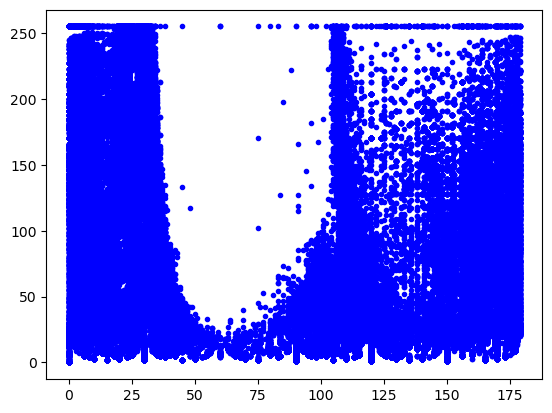

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Download files from https://drive.google.com/file/d/1XdZLvORnCnfpyBYflh15I58VQrQdVlUe/view?usp=sharing

im = cv2.imread("SkinDetection\SkinTrain1.jpg")
mask = cv2.imread("SkinDetection\SkinTrain1_mask.jpg", 0)

im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
h = im_hsv[:, :, 0]
s = im_hsv[:, :, 1]

h_skin = h[mask >= 128]
s_skin = s[mask >= 128]
h_nonskin = h[mask < 128]
s_nonskin = s[mask < 128]


cv2.imshow("image", im)
cv2.imshow("mask", mask)
cv2.imshow("hue", h)
cv2.imshow("saturation", s)

plt.plot(h_nonskin, s_nonskin, "b.")
# plt.plot(h_skin,s_skin,'r.')
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

1
2
3


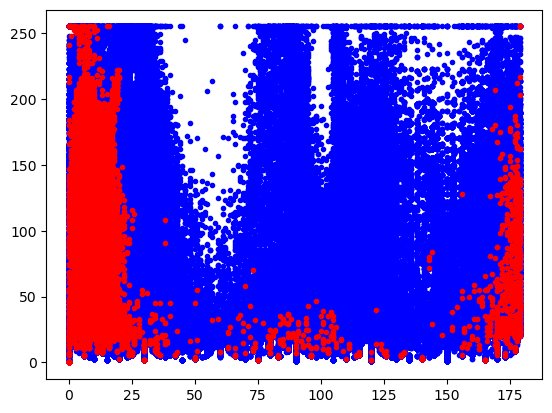

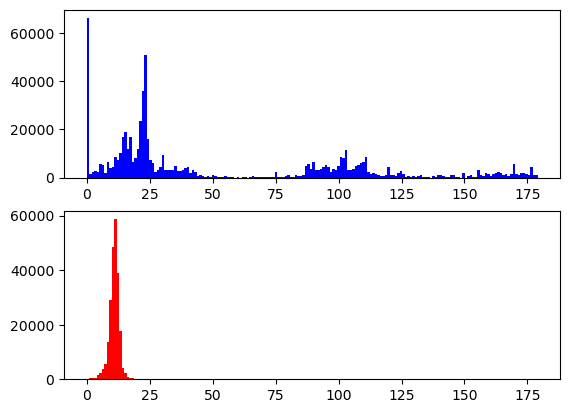

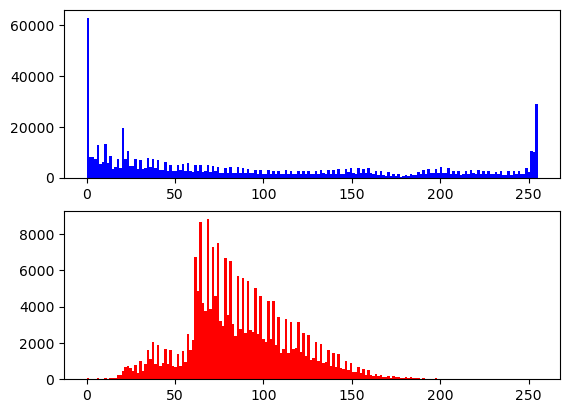

In [3]:
for im_id in range(1, 4):
    print(im_id)
    im = cv2.imread("SkinDetection\SkinTrain" + str(im_id) + ".jpg")
    mask = cv2.imread("SkinDetection\SkinTrain" + str(im_id) + "_mask.jpg", 0)

    im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    h = im_hsv[:, :, 0]
    s = im_hsv[:, :, 1]

    h_skin = h[mask >= 128]
    s_skin = s[mask >= 128]
    h_nonskin = h[mask < 128]
    s_nonskin = s[mask < 128]

    if im_id == 1:
        h_skin_all = h_skin
        s_skin_all = s_skin
        h_nonskin_all = h_nonskin
        s_nonskin_all = s_nonskin
    else:
        h_skin_all = np.concatenate((h_skin_all, h_skin))
        s_skin_all = np.concatenate((s_skin_all, s_skin))
        h_nonskin_all = np.concatenate((h_nonskin_all, h_nonskin))
        s_nonskin_all = np.concatenate((s_nonskin_all, s_nonskin))

plt.figure(0)
plt.plot(h_nonskin_all, s_nonskin_all, "b.")
plt.plot(h_skin_all, s_skin_all, "r.")

plt.figure(1)
plt.subplot(2, 1, 1)
plt.hist(h_nonskin_all, bins=180, color="b")
plt.subplot(2, 1, 2)
plt.hist(h_skin_all, bins=180, color="r")

plt.figure(2)
plt.subplot(2, 1, 1)
plt.hist(s_nonskin_all, bins=180, color="b")
plt.subplot(2, 1, 2)
plt.hist(s_skin_all, bins=180, color="r")

plt.show()

In [9]:
print("----------------- Process training inputs ---------------------")
for im_id in range(1, 4):
    print(im_id)
    im = cv2.imread("SkinDetection\SkinTrain" + str(im_id) + ".jpg")
    mask = cv2.imread("SkinDetection\SkinTrain" + str(im_id) + "_mask.jpg", 0)

    im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    h = im_hsv[:, :, 0]
    s = im_hsv[:, :, 1]

    h_skin = h[mask >= 128]
    s_skin = s[mask >= 128]
    h_nonskin = h[mask < 128]
    s_nonskin = s[mask < 128]

    if im_id == 1:
        h_skin_all = h_skin
        s_skin_all = s_skin
        h_nonskin_all = h_nonskin
        s_nonskin_all = s_nonskin
    else:
        h_skin_all = np.concatenate((h_skin_all, h_skin))
        s_skin_all = np.concatenate((s_skin_all, s_skin))
        h_nonskin_all = np.concatenate((h_nonskin_all, h_nonskin))
        s_nonskin_all = np.concatenate((s_nonskin_all, s_nonskin))

labels = np.zeros((len(h_skin_all) + len(h_nonskin_all), 1))
labels[0 : len(h_skin_all)] = 1


print("------------------------ Training ----------------------------")
print("label's shape: ", labels.shape)

features = np.zeros((len(h_skin_all) + len(h_nonskin_all), 2))
features[:, 0] = np.concatenate((h_skin_all, h_nonskin_all))
features[:, 1] = np.concatenate((s_skin_all, s_nonskin_all))

print("features's shape: ", features.shape)

# svm = cv2.ml.SVM_create()
# svm.setKernel(cv2.ml.SVM_LINEAR)
# svm.setKernel(cv2.ml.SVM_POLY)
# svm.setDegree(10)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setGamma(0.01)
svm.train(features.astype(np.float32), cv2.ml.ROW_SAMPLE, labels.astype(np.int32))

print("-----------------Classify any (h,s) value ---------------------")
test_pixels = np.array([[10, 100], [100, 150]])
responses = svm.predict(test_pixels.astype(np.float32))

print(responses)
# print(responses[1])


print("-----------------Classify all training pixels---------------------")
responses = svm.predict(features.astype(np.float32))[1]
acc = np.count_nonzero(responses == labels) * 100.0 / len(labels)

print("Accuracy :", acc)

----------------- Process training inputs ---------------------
1
2
3
------------------------ Training ----------------------------
label's shape:  (884354, 1)
features's shape:  (884354, 2)
-----------------Classify any (h,s) value ---------------------
(0.0, array([[0.],
       [0.]], dtype=float32))
-----------------Classify all training pixels---------------------
Accuracy : 76.18600696101335


In [10]:
print("----------------- Process training inputs ---------------------")
for im_id in range(1, 4):
    print(im_id)
    im = cv2.imread("SkinDetection\SkinTrain" + str(im_id) + ".jpg")
    mask = cv2.imread("SkinDetection\SkinTrain" + str(im_id) + "_mask.jpg", 0)

    im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    h = im_hsv[:, :, 0]
    s = im_hsv[:, :, 1]

    h_skin = h[mask >= 128]
    s_skin = s[mask >= 128]
    h_nonskin = h[mask < 128]
    s_nonskin = s[mask < 128]

    if im_id == 1:
        h_skin_all = h_skin
        s_skin_all = s_skin
        h_nonskin_all = h_nonskin
        s_nonskin_all = s_nonskin
    else:
        h_skin_all = np.concatenate((h_skin_all, h_skin))
        s_skin_all = np.concatenate((s_skin_all, s_skin))
        h_nonskin_all = np.concatenate((h_nonskin_all, h_nonskin))
        s_nonskin_all = np.concatenate((s_nonskin_all, s_nonskin))

labels = np.zeros((len(h_skin_all) + len(h_nonskin_all), 1))
labels[0 : len(h_skin_all)] = 1

print("------------------------ Training ----------------------------")
print("label's shape: ", labels.shape)

features = np.zeros((len(h_skin_all) + len(h_nonskin_all), 2))
features[:, 0] = np.concatenate((h_skin_all, h_nonskin_all))
features[:, 1] = np.concatenate((s_skin_all, s_nonskin_all))

print("features's shape: ", features.shape)

# svm = cv2.ml.SVM_create()
# svm.setKernel(cv2.ml.SVM_LINEAR)
# svm.setKernel(cv2.ml.SVM_POLY)
# svm.setDegree(10)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setGamma(0.01)
svm.train(features.astype(np.float32), cv2.ml.ROW_SAMPLE, labels.astype(np.int32))


print("----------------- Testing ---------------------")
for im_id in range(1, 6):
    im = cv2.imread("SkinDetection\SkinTest" + str(im_id) + ".jpg")

    im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    h = im_hsv[:, :, 0]
    s = im_hsv[:, :, 1]

    features = np.zeros((len(h.reshape(1, -1)[0]), 2))
    features[:, 0] = h.reshape(1, -1)[0]
    features[:, 1] = s.reshape(1, -1)[0]

    print("features's shape (test image): ", features.shape)

    responses = svm.predict(features.astype(np.float32))[1]

    cv2.imshow("image" + str(im_id), im)
    cv2.imshow("skindetection" + str(im_id), responses.reshape(np.shape(h)))

cv2.waitKey(0)
cv2.destroyAllWindows()

----------------- Process training inputs ---------------------
1
2
3
------------------------ Training ----------------------------
label's shape:  (884354, 1)
features's shape:  (884354, 2)
----------------- Testing ---------------------
features's shape (test image):  (797148, 2)
features's shape (test image):  (375000, 2)
features's shape (test image):  (640000, 2)
features's shape (test image):  (90000, 2)
features's shape (test image):  (397749, 2)


1
2
3


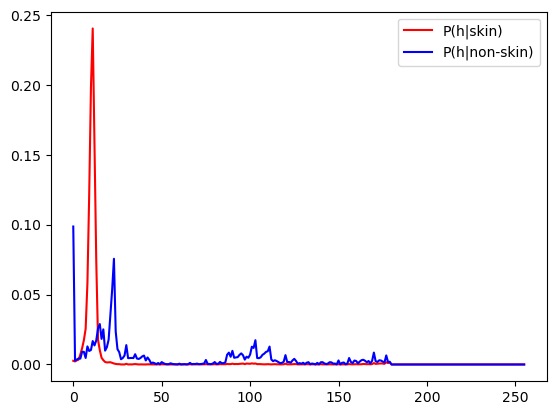

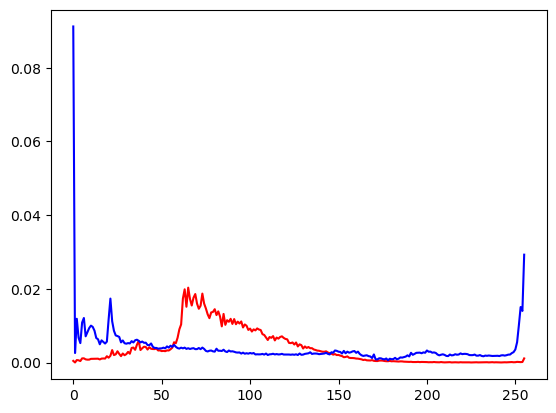

In [11]:
h_skin_hist = 0  # P(h|skin)
h_nonskin_hist = 0  # P(h|nonskin)
s_skin_hist = 0  # P(s|skin)
s_nonskin_hist = 0  # P(s|nonskin)
for im_id in range(1, 4):
    print(im_id)
    im = cv2.imread("SkinDetection\SkinTrain" + str(im_id) + ".jpg")
    mask = cv2.imread("SkinDetection\SkinTrain" + str(im_id) + "_mask.jpg", 0)
    im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    h_skin_hist = h_skin_hist + cv2.calcHist(
        [im_hsv], [0], mask, [256], [0, 256]
    )  # (image, h, count on mask, bin counts, value range)
    h_nonskin_hist = h_nonskin_hist + cv2.calcHist(
        [im_hsv], [0], 255 - mask, [256], [0, 256]
    )
    s_skin_hist = s_skin_hist + cv2.calcHist([im_hsv], [1], mask, [256], [0, 256])
    s_nonskin_hist = s_nonskin_hist + cv2.calcHist(
        [im_hsv], [1], 255 - mask, [256], [0, 256]
    )

h_skin_prob = h_skin_hist / sum(h_skin_hist)  # P(h|skin)
h_nonskin_prob = h_nonskin_hist / sum(h_nonskin_hist)  # P(h|non-skin)
s_skin_prob = s_skin_hist / sum(s_skin_hist)  # P(s|skin)
s_nonskin_prob = s_nonskin_hist / sum(s_nonskin_hist)  # P(s|non-skin)

plt.plot(h_skin_prob, "r", label="P(h|skin)")
plt.plot(h_nonskin_prob, "b", label="P(h|non-skin)")
plt.legend()
plt.figure()
plt.plot(s_skin_prob, "r", label="P(s|skin)")
plt.plot(s_nonskin_prob, "b", label="P(s|non-skin)")
plt.show()

In [12]:
h_skin_hist = 0
h_nonskin_hist = 0
s_skin_hist = 0
s_nonskin_hist = 0
for im_id in range(1, 4):
    print(im_id)
    im = cv2.imread("SkinDetection\SkinTrain" + str(im_id) + ".jpg")
    mask = cv2.imread("SkinDetection\SkinTrain" + str(im_id) + "_mask.jpg", 0)
    im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    h_skin_hist = h_skin_hist + cv2.calcHist([im_hsv], [0], mask, [256], [0, 256])
    h_nonskin_hist = h_nonskin_hist + cv2.calcHist(
        [im_hsv], [0], 255 - mask, [256], [0, 256]
    )
    s_skin_hist = s_skin_hist + cv2.calcHist([im_hsv], [1], mask, [256], [0, 256])
    s_nonskin_hist = s_nonskin_hist + cv2.calcHist(
        [im_hsv], [1], 255 - mask, [256], [0, 256]
    )

# normalize
h_skin_prob = h_skin_hist / sum(h_skin_hist)
h_nonskin_prob = h_nonskin_hist / sum(h_nonskin_hist)
s_skin_prob = s_skin_hist / sum(s_skin_hist)
s_nonskin_prob = s_nonskin_hist / sum(s_nonskin_hist)
skin_prob = sum(h_skin_hist) / (sum(h_nonskin_hist) + sum(h_skin_hist))
nonskin_prob = 1 - skin_prob


for im_id in range(1, 6):
    im = cv2.imread("SkinDetection\SkinTest" + str(im_id) + ".jpg")

    im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

    mask = np.zeros(im_hsv.shape[:2], np.uint8)
    for i in range(0, mask.shape[0]):
        for j in range(0, mask.shape[1]):
            # comparing the prob
            class_skin_prob = (
                h_skin_prob[im_hsv[i][j][0]] * s_skin_prob[im_hsv[i][j][1]] * skin_prob
            )
            class_nonskin_prob = (
                h_nonskin_prob[im_hsv[i][j][0]]
                * s_nonskin_prob[im_hsv[i][j][1]]
                * nonskin_prob
            )
            if class_skin_prob > class_nonskin_prob:
                mask[i][j] = 255

    cv2.imshow("image" + str(im_id), im)
    cv2.imshow("skindetection" + str(im_id), mask)

cv2.waitKey(0)
cv2.destroyAllWindows()

1
2
3
